## nsdmd generative model development

This model is used to do model comparison on four Dark Matter density profiles. The model compared 4 density files: NFW profile, Isothermal profile, Einasto profile and Generalized DM profile by comparing their log evidence in fitting rotational velocity cruve. We use the model density file with unknown parametes to calculate the enclosing mass and the corresponding rotational velocity. Then we use package nestle to find the best parameters fitting for the function.



## The four Dark Matter density profiles models: 


r: galactocentric radius

$ \rho( r ) $ : Dark Matter Density as a function of galactocentric radius


### (1) NFW profile :

 $ \rho \left( r \right) \propto \frac{1}{{\left( r/a \right)}{\left[ 1~+~{{\left( r/a \right)}} \right]}^{2}} $
 
 For distances close to the galactic center, $r \ll a$, the density increases as 1/$r$.  At large distances, $r \gg a$, the density decreases as 1/$r^3$. As the distance to the galactic center increases, the rotational velocity decreases.


### (2) Isothermal profile:

  $  \rho \left( r \right) \propto \frac{1}{{\left[ 1~+~{{\left( r/a \right)}^{2}} \right]}} $
  
For distances close to the galactic center, $r \ll a$, the density  becomes constant.  At large distances, $r \gg a$, the density decreases as 1/$r^2$.

### (3) Einasto profile :

$ \rho \left( r \right) \propto \exp \left\{ { - 2n\left[ {{{\left( {\frac{r}{a}} \right)}^{1/n}} - 1} \right]} \right\} $

The Einasto profile has two free parameters: the Einasto index $n$, which defines the shape of the profile, and the scale radius $a$. For distances close to the galactic center, $r~\ll~a$, the density approaches a constant value, proportional to $\exp \left\{ {2n} \right\}$.  

### (4) Generalized DM profile :

 $ \rho \left( r \right) \propto    \frac{1}{{\left( r/a \right)}^{\gamma}{\left[ 1~+~{{\left( r/a \right)}^{\alpha}} \right]}^{ \frac{(\beta - \gamma)}{\alpha}}} $

The profile has four free parameters: the scale radius $a$ and $\alpha$, $\beta$, and $\gamma$.  We can put constraints on some of the parameters by requiring that the density remains finite at small distance and that the enclosed mass reaches a limit at large distances.  For distances close to the galactic center, $r~\ll~a$, the density is proportional to as 1/$r^{\gamma}$. The requirement that the enclosed mass remains finite at small $r$ requires that $\gamma~<~3$.  At large distances, $r~\gg~a$, the density decreases as 1/$r^\beta$.  The requirement that the enclosed mass in spherical shells that these distances approaches zero requires that  $\beta~\geq~3$.



### Rotational curve calculation by obtained density model
We can calcuate rotational curve from Dark Matter density profiles. Note that we assuming dark matter distribution is spherically symmetric. The velocity is calculated by the following equation. 

$ \frac{GMm}{4 \pi  R^2} = \frac {m v^2}{R}$  where $M=\int_{R_o}^{R} \rho (r) 4 \pi  R^2 dr$

$v_{calculated} = \sqrt { \frac{ G   \int_{R_o}^{R} \rho (r) 4 \pi  r^2 dr} {4 \pi  r}  }   $

## Model
The generative model does Bayesian inference on dark matter density file and it returns posterior probability (of unknown parameters).



$ M $ = The rotational curve calculated with the existence of dark matter and the dark matter density is given by the density profile. We have four dark matter density files and give us 4 models to compare. 

$I$ = prior information. Note that we set priors for all unknown parameters in density file. 

$D$ = measured rotational velocity data 

The posterior distribution is calculated as, $ p(M|D,I) = \frac{p(M|I) p(D|M, I)}{p(D|I)} $

$  p(D|M, I) $ : likelihood function 

$ p(M|I)  $ : prior probability 

$ p(M|D,I)  $ : posterior probability (of unknown parameters)

$ p(D|I) $ : normalization factor 

### log likelihood 

The log likelihood is meant to capture how well a model is able to reproduce the data that it is meant to simulate. The loglikelihood function the genrative model is calculated by, 

$log p(D|M, I) = constant* \prod_{i}^{} log(\sigma_i)  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $

$constant* \prod_{i}^{} log(\sigma_i)  $  Note that this part doesn't matter much since they are the same for all.

Therefore, the loglikelihood function: $log p(D|M, I) =  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $

### prior 

We choose to use uniform priors and we limit the range of the priors. For example, in NFW model, there are one unknown parameter a and one normalization parameter. The choosen priors for a and normalization parameters are uniform prior in [0,10] and [0,10e10], respectively. 

### Sampling 
Then we use nested sampling method to do bayesian inference, get the parameter estimation and the log evidence. 

Nested Sampling is a computational approach for integrating posterior
probability in order to compare models in Bayesian statistics. It is similar
to Markov Chain Monte Carlo (MCMC) in that it generates samples that can be
used to estimate the posterior probability distribution. Unlike MCMC, the
nature of the sampling also allows one to calculate the integral of the
distribution. 


The reason Nested Sampling is more appropriate for this project than MCMC is
Nested Sampling has the advantage that it calculates the evidence (integral
of the posterior) and this way you can compare different models. It is good
for sampling posterior distributions with strong dependence between
variables. Another advantage of Nested Sampling is that you don’t have to
know where MLE is, while using MCMC we would have to normalize to compare
our models since our models have different number of degrees of freedom. 

For more information, see the Nestle package documentation.

### Imports

In [1]:
import numpy as np
import nestle
import math

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import corner

from scipy.integrate import quad

from nsdmd import model 
from nsdmd import io

import pandas as pd

### Loading the and visualizing the data

The data will be used in this project is the measured rotational speed of the interstellar medium in our local galaxy, as shown in the following figure. The data used in this notebook is from reference 2. 

In [2]:
data_file = io.get_data_file_path('DMdataref2.txt')
data_x,data_xerr,data_y,data_yerr =io.load_data(data_file)

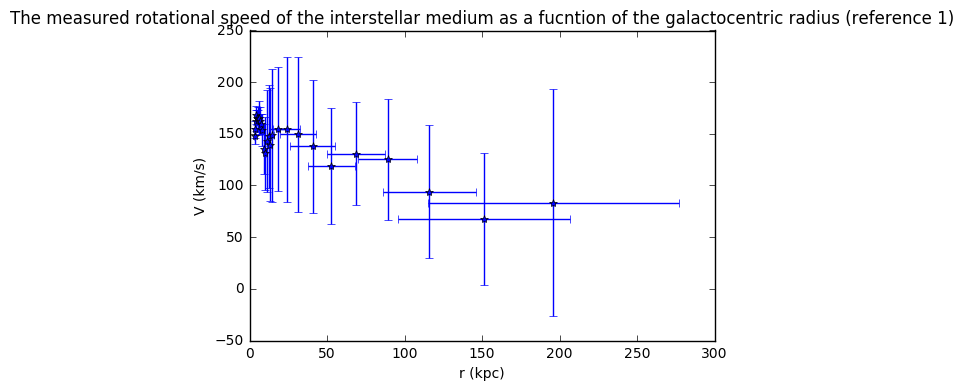

In [3]:
plt.figure()
plt.errorbar(data_x,data_y,xerr=data_xerr,yerr=data_yerr,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius (reference 1)")
plt.show()

## Detailed model information on each density profile

### NFW

### mass and rotational velocity calculation 
We are going to calculate the mass between 0 and each data point by integrating the NFW distribution. And use the mass to calculate the rotational velocity. 
$ mass = 4\pi*(a^3)(\log((a+x)/a)-x/(a+x))$ , where a is unknown parameter. 


rotation velocity $  = theta[1]*sqrt(mass/x) $, where theta[1] is a normalization parameters. 
    

#### Log Likelihood 


Therefore, the loglikelihood function $=  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $

#### Prior for NFW model

The choosen priors for a and normalization parameter (theta[1]) are uniform prior in [0,10] and [0,10e10], respectively.
### sampling results

In [12]:
def sample_withplot (loglike_model, prior_transform_model, datafile,priorRange):
    data_file = io.get_data_file_path(datafile)
    data_x,data_xerr,data_y,data_yerr = io.load_data(data_file)
    
    #n: number of parameters, len(priorRange)
    n=len(priorRange) 

    def new_loglike_model(theta):
        return loglike_model(theta, (data_x,data_xerr,data_y,data_yerr))
        
    def new_prior_transform_model(theta):
        return prior_transform_model(theta,priorRange)
    
    result = nestle.sample(new_loglike_model, new_prior_transform_model, n)
    
    
    print ('log evidence')
    print (result.logz)

    print ('numerical (sampling) error on logz')
    print (result.logzerr)   
       
    print ('array of sample parameters')
    print (result.samples)  
       
    print ('array of weights associated with each sample')
    print (result.weights)
    

    
    import matplotlib.pyplot as plt
    import corner


    p_fit, cov_fit = nestle.mean_and_cov(result.samples, result.weights)


    plt.figure()
    plt.errorbar(data_x,data_y,yerr=data_yerr,fmt='*')
    plt.xlabel("r (kpc)")
    plt.ylabel('V (km/s)')
    plt.title("Results of using the model to fit the DM rotational velocity distribution")
    xplot = [5+5*i for i in range(40)]
    yplot = [model.model_NFW(xplot[i], p_fit) for i in range(40)]
    plt.plot(xplot,yplot)
    plt.show()

    fig = corner.corner(result.samples, weights=result.weights, labels=['a', 'rho0'],
                            range=[0.99999, 0.99999], bins=30)
    plt.show()

    
    return result 



log evidence
-12.5649525949
numerical (sampling) error on logz
0.29571446892424486
array of sample parameters
[[  9.39437900e+00   8.53596950e+10]
 [  8.90585338e+00   7.94658868e+10]
 [  8.76335331e+00   7.81975575e+10]
 ..., 
 [  2.33848688e+00   4.08808400e+08]
 [  2.92354915e+00   2.55283436e+08]
 [  2.70695358e+00   3.00372744e+08]]
array of weights associated with each sample
[ 0.          0.          0.         ...,  0.00305674  0.00275748
  0.00361554]


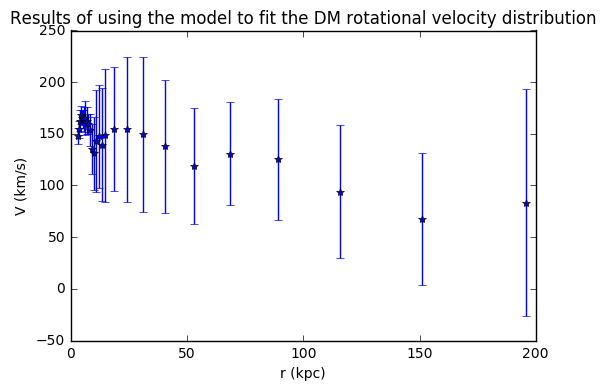

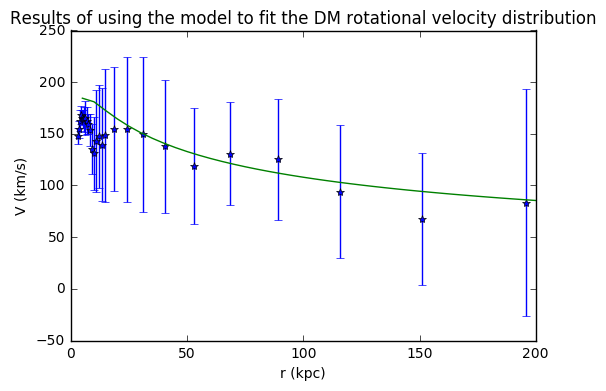

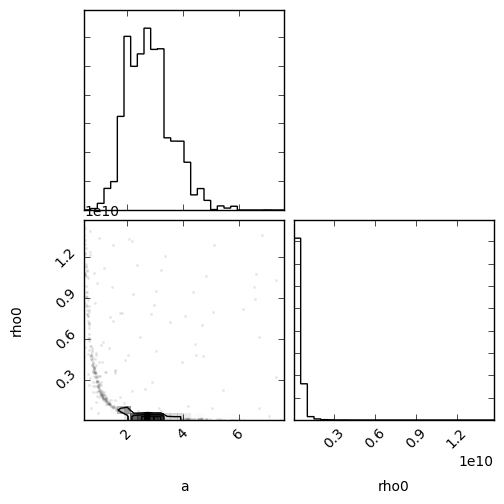

   ncall: 56866
       h: 8.7447047131148175
 logzerr: 0.29571446892424486
    logz: -12.564952594886085
 samples: array([[  9.39437900e+00,   8.53596950e+10],
       [  8.90585338e+00,   7.94658868e+10],
       [  8.76335331e+00,   7.81975575e+10],
       ..., 
       [  2.33848688e+00,   4.08808400e+08],
       [  2.92354915e+00,   2.55283436e+08],
       [  2.70695358e+00,   3.00372744e+08]])
  logvol: array([ -4.61016602,  -4.62016602,  -4.63016602, ..., -15.22517019,
       -15.22517019, -15.22517019])
 weights: array([ 0.        ,  0.        ,  0.        , ...,  0.00305674,
        0.00275748,  0.00361554])
    logl: array([ -3.69163974e+06,  -3.15950147e+06,  -3.03078946e+06, ...,
        -3.13018915e+00,  -3.23322149e+00,  -2.96229651e+00])
   niter: 1062

In [13]:
sample_withplot (model.loglike_NFW, model.prior_transform_NFW, 'DMdataref2.txt',[10,10e10])

Note that here we will only show the rotational velocity plot as an example for the NFW model. For other models, the same method is applied. The plots would be further discussed in the report. 

### Isothermal

We are going to calculate the mass between 0 and each data point by integrating the NFW distribution. However, the mass defined here does not include the normalization constant rho0 (kg/kpc^3).

$ mass = 4 \pi (a^3)(x/a - \arctan(x/a)) $ 

the rotation velocity = theta[1]*sqrt(mass/x) , where theta[1] is a constant factor.
    
#### Log Likelihood of Isothermal

Therefore, the loglikelihood function $=  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $

#### Prior for Isothermal model
The choosen priors for a and normalization parameters (theta[1]) are uniform prior in [0,10] and [0,10e10], respectively.
### sampling results

In [6]:
model.sample (model.loglike_ISO, model.prior_transform_ISO, 'DMdataref2.txt',[10,10e10])

log evidence
-13.5376092119
numerical (sampling) error on logz
0.2580115283108438
array of sample parameters
[[  8.79790319e+00   9.78829247e+10]
 [  7.86225643e+00   9.81481174e+10]
 [  8.05473543e+00   9.45406583e+10]
 ..., 
 [  8.51649545e-02   6.70719695e+10]
 [  9.60721887e-02   5.20737701e+10]
 [  1.62082371e-01   1.85220602e+10]]
array of weights associated with each sample
[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e

   ncall: 27895
       h: 6.6569948741297331
 logzerr: 0.2580115283108438
    logz: -13.537609211907121
 samples: array([[  8.79790319e+00,   9.78829247e+10],
       [  7.86225643e+00,   9.81481174e+10],
       [  8.05473543e+00,   9.45406583e+10],
       ..., 
       [  8.51649545e-02,   6.70719695e+10],
       [  9.60721887e-02,   5.20737701e+10],
       [  1.62082371e-01,   1.85220602e+10]])
  logvol: array([ -4.61016602,  -4.62016602,  -4.63016602,  -4.64016602,
        -4.65016602,  -4.66016602,  -4.67016602,  -4.68016602,
        -4.69016602,  -4.70016602,  -4.71016602,  -4.72016602,
        -4.73016602,  -4.74016602,  -4.75016602,  -4.76016602,
        -4.77016602,  -4.78016602,  -4.79016602,  -4.80016602,
        -4.81016602,  -4.82016602,  -4.83016602,  -4.84016602,
        -4.85016602,  -4.86016602,  -4.87016602,  -4.88016602,
        -4.89016602,  -4.90016602,  -4.91016602,  -4.92016602,
        -4.93016602,  -4.94016602,  -4.95016602,  -4.96016602,
        -4.97016602,  -4.

### Einasto 


density =$ \exp(-2n*(x/a)^(1/n) - 1)$ , where a , n are unknown paramters. 

mass = $ 4\pi*integral(density*x^2) $

vrot = $theta[2]*\sqrt(mass/x) $ , where theta[2] is normalization parameter. 



#### Log Likelihood of Einasto

Therefore, the loglikelihood function $=  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $
#### Prior for Einasto model

The choosen priors for a, n and normalization parameters(theta[2]) are uniform prior in [0,10],[0,10] and [0,10e10], respectively.
### sampling results

In [7]:
model.sample (model.loglike_Einasto, model.prior_transform_Einasto, 'DMdataref2.txt',[10,10,10E10])

log evidence
-16.4984664159
numerical (sampling) error on logz
0.31390676101001536
array of sample parameters
[[  6.53713891e+00   5.50102688e-02   8.73137971e+10]
 [  6.38116096e+00   6.61389300e-01   8.52934077e+10]
 [  9.09970237e+00   7.96740798e-01   3.04493788e+10]
 ..., 
 [  1.06080574e+00   1.33128397e+00   1.08842587e+10]
 [  1.20506360e+00   1.23626215e+00   5.28937416e+09]
 [  1.21816750e+00   1.30160583e+00   7.47226092e+09]]
array of weights associated with each sample
[ 0.          0.          0.         ...,  0.0032015   0.00273602
  0.00246298]


   ncall: 40638
       h: 9.8537454607798889
 logzerr: 0.31390676101001536
    logz: -16.498466415877985
 samples: array([[  6.53713891e+00,   5.50102688e-02,   8.73137971e+10],
       [  6.38116096e+00,   6.61389300e-01,   8.52934077e+10],
       [  9.09970237e+00,   7.96740798e-01,   3.04493788e+10],
       ..., 
       [  1.06080574e+00,   1.33128397e+00,   1.08842587e+10],
       [  1.20506360e+00,   1.23626215e+00,   5.28937416e+09],
       [  1.21816750e+00,   1.30160583e+00,   7.47226092e+09]])
  logvol: array([ -4.61016602,  -4.62016602,  -4.63016602, ..., -16.63517019,
       -16.63517019, -16.63517019])
 weights: array([ 0.        ,  0.        ,  0.        , ...,  0.0032015 ,
        0.00273602,  0.00246298])
    logl: array([ -2.69443621e+07,  -5.86802907e+06,  -1.33801128e+06, ...,
        -5.60743057e+00,  -5.76454758e+00,  -5.86967970e+00])
   niter: 1203

### Generalized model

We have 5 parameters, there are 
    a = theta[0]
    alpha = theta[1]
    beta = theta[2]
    gamma = theta[3]
    rho0 = theta[4], normalizaion paramter. 
    
density  = $ rho0/(((x/a)^ \gamma)*(1. + (x/a)^ \alpha))**((beta - \gamma)/\alpha) $ 
There are no numerical solution for the mass and velocity. 

#### Log Likelihood 

Therefore, the loglikelihood function $=  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $
#### Prior for generalized model

The choosen priors for a, alpha, beta, gamma, rho0 are uniform priors [0,5],[0,10],[0,4],[0,1.5]and [0,5e8] , repectively. 
### sampling results 




In [8]:
model.sample (model.loglike_GeneralizedHalo, model.prior_transform_GeneralizedHalo, 'DMdataref2.txt',[5.,10.,4.,1.5,5E8])

log evidence
-11.0773418115
numerical (sampling) error on logz
0.26123244560345743
array of sample parameters
[[  7.65985169e+00   1.69537980e+01   4.79716263e+00   2.96429431e+00
    9.42656991e+08]
 [  8.21481154e+00   1.05491951e+00   4.20905537e+00   2.96947106e+00
    5.72177596e+08]
 [  9.45747424e+00   1.62332410e+01   3.80453066e+00   2.98114422e+00
    1.45462407e+08]
 ..., 
 [  3.62432237e+00   1.83605137e+01   3.07078607e+00   1.23065097e+00
    6.05125719e+07]
 [  2.72086982e+00   1.58068446e+01   3.18841121e+00   6.08450000e-02
    1.40151624e+08]
 [  3.34961807e+00   1.40030935e+01   3.33392999e+00   7.58550784e-01
    8.30708955e+07]]
array of weights associated with each sample
[ 0.          0.          0.         ...,  0.00396821  0.00292021
  0.00203546]


   ncall: 337361
       h: 6.8242390635963348
 logzerr: 0.26123244560345743
    logz: -11.077341811460114
 samples: array([[  7.65985169e+00,   1.69537980e+01,   4.79716263e+00,
          2.96429431e+00,   9.42656991e+08],
       [  8.21481154e+00,   1.05491951e+00,   4.20905537e+00,
          2.96947106e+00,   5.72177596e+08],
       [  9.45747424e+00,   1.62332410e+01,   3.80453066e+00,
          2.98114422e+00,   1.45462407e+08],
       ..., 
       [  3.62432237e+00,   1.83605137e+01,   3.07078607e+00,
          1.23065097e+00,   6.05125719e+07],
       [  2.72086982e+00,   1.58068446e+01,   3.18841121e+00,
          6.08450000e-02,   1.40151624e+08],
       [  3.34961807e+00,   1.40030935e+01,   3.33392999e+00,
          7.58550784e-01,   8.30708955e+07]])
  logvol: array([ -4.61016602,  -4.62016602,  -4.63016602, ..., -14.06517019,
       -14.06517019, -14.06517019])
 weights: array([ 0.        ,  0.        ,  0.        , ...,  0.00396821,
        0.00292021,  0.00203546])
    lo